In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('transactions_n100000.csv')

In [3]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234


## Data Processing

In [4]:
df['location'].value_counts()

2    37343
6    37032
9    34083
4    33890
7    33547
8    22082
3    21257
1    21216
5    20291
Name: location, dtype: int64

In [5]:
df['item_name'].value_counts()

fries     100000
burger     76114
shake      46283
salad      38344
Name: item_name, dtype: int64

### Dealing with datetime

In [6]:
from datetime import datetime

In [7]:
datetime.strptime(df['order_timestamp'][0], '%Y-%m-%d %H:%M:%S').isoweekday()

4

In [8]:
hour=[]
day=[]
for i in range(df.shape[0]):
    dt = datetime.strptime(df['order_timestamp'][i], '%Y-%m-%d %H:%M:%S')
    h = dt.hour
    d = dt.isoweekday()
    
    hour.append(h)
    day.append(d)

df['hour'] = hour
df['day'] = day

In [9]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,hour,day
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,18,4
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,18,4
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,18,4
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,11,3
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,11,3


In [10]:
df['day'].value_counts()

5    37708
3    37278
1    37255
7    37236
2    37206
6    37075
4    36983
Name: day, dtype: int64

In [11]:
meal = []
wday = []
for i in range(df.shape[0]):
    m = df['hour'][i]
    w = df['day'][i]
    
    if m in range(11,15):
        meal.append('lunch')
    elif m in range(15,17):
        meal.append('afternoon tea')
    elif m in range(17,21):
        meal.append('dinner')
    elif m in range(6,11):
        meal.append('breakfast')
    else:
        meal.append('midnight snack')
    
    if w in range(1,6):
        wday.append('weekday')
    else:
        wday.append('weekend')

df['meal'] = meal
df['wday'] = wday

In [12]:
df.head()

,ticket_id,order_timestamp,location,item_name,item_count,lat,long,hour,day,meal,wday
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605,18,4,dinner,weekday
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605,18,4,dinner,weekday
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605,18,4,dinner,weekday
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234,11,3,lunch,weekday
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234,11,3,lunch,weekday


In [13]:
df['meal'].value_counts()

dinner            99100
midnight snack    79421
lunch             74171
afternoon tea      8049
Name: meal, dtype: int64

In [14]:
df['wday'].value_counts()

weekday    186430
weekend     74311
Name: wday, dtype: int64

In [34]:
df['location'] = df['location'].astype('object')

In [94]:
df1 = df[['ticket_id', 'location', 'item_name', 'item_count', 'meal','wday']]
df1.head()

,ticket_id,location,item_name,item_count,meal,wday
0,0x872a40,4,shake,2,dinner,weekday
1,0x872a40,4,burger,2,dinner,weekday
2,0x872a40,4,fries,2,dinner,weekday
3,0x598eb3,5,burger,1,lunch,weekday
4,0x598eb3,5,salad,2,lunch,weekday


In [36]:
df1['location'].value_counts()

2    37343
6    37032
9    34083
4    33890
7    33547
8    22082
3    21257
1    21216
5    20291
Name: location, dtype: int64

### One Hot Encoding

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [61]:
one_hot = OneHotEncoder(sparse=False)

In [62]:
df1.dtypes

ticket_id     object
location      object
item_name     object
item_count     int64
meal          object
wday          object
dtype: object

In [90]:
df1.head()

,location,item_name,item_count,meal,wday
ticket_id,,,,,
0x872a40,4,shake,2,dinner,weekday
0x872a40,4,burger,2,dinner,weekday
0x872a40,4,fries,2,dinner,weekday
0x598eb3,5,burger,1,lunch,weekday
0x598eb3,5,salad,2,lunch,weekday


In [95]:
df_cat = pd.DataFrame(one_hot.fit_transform(df1.loc[:,['item_name', 'meal', 'wday']]))

In [96]:
one_hot.get_feature_names()

array(['x0_burger', 'x0_fries', 'x0_salad', 'x0_shake',
       'x1_afternoon tea', 'x1_dinner', 'x1_lunch', 'x1_midnight snack',
       'x2_weekday', 'x2_weekend'], dtype=object)

In [97]:
df_cat.columns = ['burger','fries','salad',
                  'shake','afternoon_tea','dinner','lunch', 
                  'midnight_snack','weekday','weekend']
df_cat

,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,weekend
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
260736,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
260737,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
260738,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
260739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [98]:
df2 = df1.drop(['item_name', 'meal', 'wday'],axis = 1)

In [100]:
df_new = pd.concat((df2,df_cat),axis = 1)
df_new.head()

,ticket_id,location,item_count,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,weekend
0,0x872a40,4,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0x872a40,4,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0x872a40,4,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0x598eb3,5,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0x598eb3,5,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [121]:
df_new['burger'] = df_new['item_count']*df_new['burger']
df_new['fries'] = df_new['item_count']*df_new['fries']
df_new['salad'] = df_new['item_count']*df_new['salad']
df_new['shake'] = df_new['item_count']*df_new['shake']

In [148]:
df3 = df_new.groupby(['ticket_id'],
                 as_index=False, sort=False).agg({
    'burger':'sum', 
    'fries':'sum',
    'salad':'sum',
    'shake':'sum',
    'location': 'median',
    'afternoon_tea': 'median',
    'dinner': 'median',
    'lunch': 'median',
    'midnight_snack':'median',
    'weekday':'median',
    'weekend':'median'b
    
})

df3

,ticket_id,burger,fries,salad,shake,location,afternoon_tea,dinner,lunch,midnight_snack,weekday,weekend
0,0x872a40,2.0,2.0,0.0,2.0,4.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0x598eb3,1.0,3.0,2.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0x5646c2,0.0,3.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0x4022cf,0.0,4.0,4.0,0.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0x7a39d9,5.0,5.0,0.0,5.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x75c9e7,2.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0
99996,0x66f1df,1.0,1.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,1.0
99997,0x4e2756,4.0,4.0,0.0,4.0,8.0,1.0,0.0,0.0,0.0,0.0,1.0
99998,0x3c0582,3.0,4.0,1.0,3.0,9.0,0.0,1.0,0.0,0.0,1.0,0.0


In [172]:
d = pd.DataFrame(df3.iloc[:,0])

In [174]:
d[['loc1', 'loc2', 'loc3', 'loc4', 'loc5', 'loc6', 'loc7', 'loc8', 'loc9']] = pd.get_dummies(df3['location'])

In [178]:
d.head()

,ticket_id,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9
0,0x872a40,0,0,0,1,0,0,0,0,0
1,0x598eb3,0,0,0,0,1,0,0,0,0
2,0x5646c2,0,0,1,0,0,0,0,0,0
3,0x4022cf,0,0,0,1,0,0,0,0,0
4,0x7a39d9,0,0,0,0,0,0,1,0,0


In [228]:
df_final = df3.merge(d, on = 'ticket_id')

In [229]:
df_final = df_final.drop(['location'],axis = 1)

In [230]:
df_final.columns.tolist()

['ticket_id',
 'burger',
 'fries',
 'salad',
 'shake',
 'afternoon_tea',
 'dinner',
 'lunch',
 'midnight_snack',
 'weekday',
 'weekend',
 'loc1',
 'loc2',
 'loc3',
 'loc4',
 'loc5',
 'loc6',
 'loc7',
 'loc8',
 'loc9']

In [231]:
df_final

,ticket_id,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,weekend,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9
0,0x872a40,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,0,0
1,0x598eb3,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1,0,0,0,0
2,0x5646c2,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,1,0,0,0,0,0,0
3,0x4022cf,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0
4,0x7a39d9,5.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x75c9e7,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0
99996,0x66f1df,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,0,1,0,0,0
99997,0x4e2756,4.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0
99998,0x3c0582,3.0,4.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1


In [232]:
df_final = df_final.set_index('ticket_id')

In [233]:
# df_f2 = df_final

In [234]:
df_final=df_final.drop(['weekend'],axis=1)

In [253]:
df_final.head()

,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9
ticket_id,,,,,,,,,,,,,,,,,,
0x872a40,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0
0x598eb3,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0,0,0
0x5646c2,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0
0x4022cf,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0
0x7a39d9,5.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0


In [256]:
df_final['midnight_snack'].sum()/df_final.shape[0]

0.34268

In [246]:
# col=[['afternoon_tea', 'dinner', 'lunch', 'midnight_snack']]

In [250]:
# df_f2['meal'] = df3[col].eq('Yes').idxmax(axis=1)

In [241]:
# d=df3[['afternoon_tea', 'dinner', 'lunch', 'midnight_snack']]

In [251]:
# df_f2.merge(d, on = 'ticket_id')

## Clustering

### Choose the best k

In [210]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

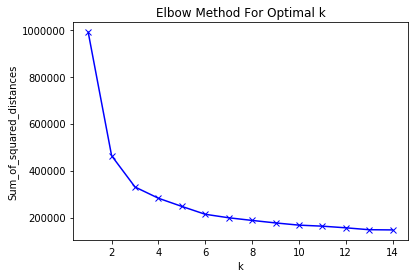

In [254]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_final)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [252]:
# range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
# # initialise kmeans
#     kmeans = KMeans(n_clusters=num_clusters)
#     kmeans.fit(df_final)
#     cluster_labels = kmeans.labels_
 
#  # silhouette score
#     silhouette_avg.append(silhouette_score(df_final, cluster_labels))
# plt.plot(range_n_clusters, silhouette_avg, 'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

#### The best k is 3 !!

In [257]:
km = KMeans(n_clusters = 3)
km.fit(df_final)
label = km.labels_
center = km.cluster_centers_

In [258]:
df_final['labels']=km.labels_

In [259]:
df_final['labels'].value_counts()

0    39029
1    30955
2    30016
Name: labels, dtype: int64

In [261]:
df_final.head()

,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,labels
ticket_id,,,,,,,,,,,,,,,,,,,
0x872a40,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0
0x598eb3,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0,0,0,1
0x5646c2,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1
0x4022cf,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1
0x7a39d9,5.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,2


In [265]:
df_final.reset_index()

,ticket_id,burger,fries,salad,shake,afternoon_tea,dinner,lunch,midnight_snack,weekday,loc1,loc2,loc3,loc4,loc5,loc6,loc7,loc8,loc9,labels
0,0x872a40,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0
1,0x598eb3,1.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,0,1,0,0,0,0,1
2,0x5646c2,0.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1
3,0x4022cf,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,1
4,0x7a39d9,5.0,5.0,0.0,5.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x75c9e7,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0
99996,0x66f1df,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0,0,0,1,0,0,0,0
99997,0x4e2756,4.0,4.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,2
99998,0x3c0582,3.0,4.0,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,1,2


In [266]:
df_final.to_csv('a2.csv')

In [267]:
df3.to_csv('s22.csv')

In [ ]:
#We did the rest in Tableau